# The read depth distribution of variant genotypes (histogram)
This information can be found in the sample specific FORMAT field for each variant/line. Check the file header to decide which ID is appropriate.


In [193]:
data = open('GeneVariants_Annotated.vcf' , mode = 'r') #Open data file

In [194]:
data #Check data is there and opened

<_io.TextIOWrapper name='GeneVariants_Annotated.vcf' mode='r' encoding='UTF-8'>

In [195]:
read_data = [] #open blank list 

In [196]:
for line in data:
    if "#" in line: #delete header
        continue 
    else:
        new_line = line.split("\t") #Lines are splitted by tabs
        part = new_line[7] #take the last part as a whole and divide it by ;
        new_line1 = part.split(";") #Split info part by ;
        info = new_line1[7] #Gather the read depth info located in column 7
        number = info[3:] #eliminate words/letters
        if "," in number: #eliminate double values
            continue
        else: 
            number = int(number) #change the values from strings to integers
            read_data.append(number) #append data to a new list

In [197]:
read_data.sort() #sort data for better analysis

In [198]:
import matplotlib.pyplot as plt #import libraries for graphing
import numpy as np

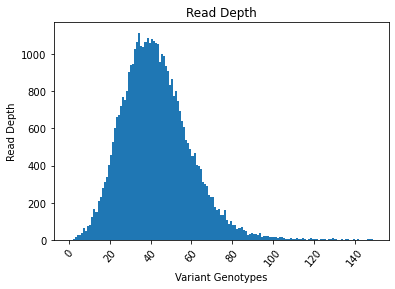

In [199]:
fig, ax = plt.subplots()
ax.hist(read_data, range(150)) #change range of x axis
plt.title('Read Depth')
plt.xlabel('Variant Genotypes')
plt.ylabel('Read Depth')
plt.xticks(rotation=50)
plt.show()

# The quality distribution of variant genotypes (histogram)
This information can be found in the sample specific FORMAT field for each variant/line. Check the file header to decide which ID is appropriate.

In [200]:
data = open('GeneVariants_Annotated.vcf' , mode = 'r') #Open data file

In [201]:
data #Check data is there and opened

<_io.TextIOWrapper name='GeneVariants_Annotated.vcf' mode='r' encoding='UTF-8'>

In [202]:
quality_data = []

In [203]:
for line in data:
    if "#" in line: #delete header
        continue 
    else:
        new_line = line.split("\t") #Lines are splitted by tabs
        quality = float(new_line[5]) #gather data
        quality_data.append(quality)

In [204]:
quality_data.sort()

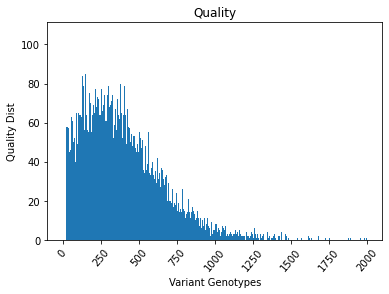

In [205]:
fig, ax = plt.subplots()
ax.hist(quality_data, range(2000))
plt.title('Quality')
plt.xlabel('Variant Genotypes')
plt.ylabel('Quality Dist')
plt.xticks(rotation=50)
plt.show()

# The allele frequency spectrum of your identified variants (histogram)
This information is pre-calculated for you and can be found in the variant specific INFO field. Check the file header to decide which ID is appropriate.


In [206]:
data = open('GeneVariants_Annotated.vcf' , mode = 'r') #Open data file

In [207]:
data #Check data is there and opened

<_io.TextIOWrapper name='GeneVariants_Annotated.vcf' mode='r' encoding='UTF-8'>

In [208]:
frequency_data = []

In [209]:
for line in data:
    if "#" in line: #delete header
        continue 
    else:
        new_line = line.split("\t") #Lines are splitted by tabs
        part = new_line[7] #take the last part as a whole 
        new_line1 = part.split(";") #divide by ; 
        info = new_line1[3] #gather only allele frequency data
        number = info[3:] #eliminate letters
        if "," in number: #eliminate double values
            continue
        else: 
            number = float(number) #change to decimals
            frequency_data.append(number)

In [210]:
frequency_data.sort()

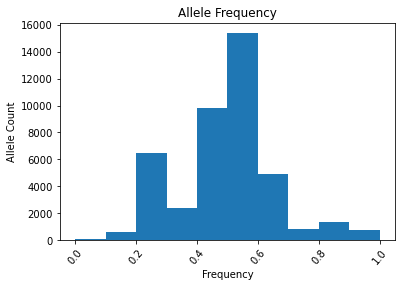

In [211]:
fig, ax = plt.subplots()
ax.hist(frequency_data)
plt.title('Allele Frequency')
plt.xlabel('Frequency')
plt.ylabel('Allele Count')
plt.xticks(rotation=50)
plt.show()

# A summary of the predicted effect(s) of each variant as determed by snpEff (barplot)
This information was added to the VCF by snpEff and can be found in the variant specific INFO field. Check the file header to decide which ID is appropriate and how to parse the information.
We encourage you to consider every possible effect for each variant, but feel free to just grab the first one.

In [212]:
data = open('GeneVariants_Annotated.vcf' , mode = 'r') #Open data file

In [213]:
data #Check data is there and opened

<_io.TextIOWrapper name='GeneVariants_Annotated.vcf' mode='r' encoding='UTF-8'>

In [214]:
variant_data = []

In [215]:
for line in data:
    if "#" in line: #delete header
        continue 
    else:
        new_line = line.split("\t") #Lines are splitted by tabs
        part = new_line[7] #take the last part as a whole 
        new_line1 = part.split(";")[-1] #divide by ; and take only last part
        new_line1 = new_line1.split("|")[1] #split by | and choose only predicted effects located in column 2
        variant_data.append(new_line1)  

In [216]:
import pandas as pd #import pandas to manipulate data
from pandas import DataFrame

In [217]:
variants = DataFrame(variant_data,columns=['Effect']) #make data frame 

In [218]:
variants #check data frame

,Effect
0,upstream_gene_variant
1,upstream_gene_variant
2,upstream_gene_variant
3,upstream_gene_variant
4,upstream_gene_variant
...,...
42564,upstream_gene_variant
42565,upstream_gene_variant
42566,upstream_gene_variant
42567,upstream_gene_variant


In [219]:
variants = variants["Effect"].value_counts().sort_index() #count common effects and sort them

In [220]:
import matplotlib.pyplot as plt #import libraries
import numpy as np

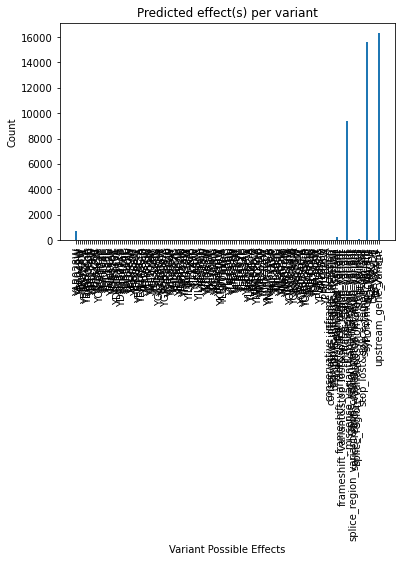

In [221]:
fig, ax = plt.subplots()
ax.bar(variants.index,variants) #set x and y axis
plt.xticks(rotation=90) #Rotates the axis labels
plt.title('Predicted effect(s) per variant')
plt.xlabel('Variant Possible Effects')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Final figure

In [222]:
import matplotlib.gridspec as gridspec #Allows us to change the size of our graphs

(array([   67.,   640.,  6466.,  2356.,  9786., 15391.,  4901.,   807.,
         1319.,   764.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

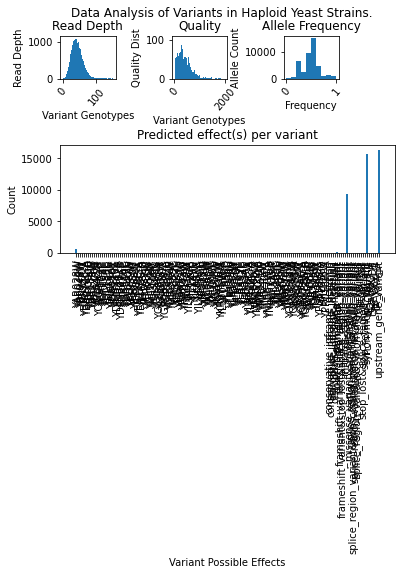

In [223]:
fig = plt.figure(1) #Make a single figure
fig.suptitle("Data Analysis of Variants in Haploid Yeast Strains.", fontsize=12) #Add title
gridspec.GridSpec(50,150) #make grid of 50 rows and 150 columns
plt.subplot2grid((50,150), (25,0), colspan=150, rowspan=25) #make subplot that starts at row 25 but column 0
plt.title('Predicted effect(s) per variant')
plt.xlabel('Variant Possible Effects')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.bar(variants.index,variants) 
plt.subplot2grid((50,150), (0,0), colspan=25, rowspan=10)  #make subplot that starts at column 0 and has a length of 25 and height of 10
plt.title('Read Depth')
plt.xlabel('Variant Genotypes')
plt.ylabel('Read Depth')
plt.xticks(rotation=50)
plt.hist(read_data, range(150))
plt.subplot2grid((50,150), (0,50), colspan=25, rowspan=10) #make subplot that starts at column 50 and has a length of 25 and height of 10
plt.title('Quality')
plt.xlabel('Variant Genotypes')
plt.ylabel('Quality Dist')
plt.xticks(rotation=50)
plt.hist(quality_data, range(2000))
plt.subplot2grid((50,150), (0,100), colspan=25, rowspan=10) #make subplot that starts at column 100 and has a length of 25 and height of 10
plt.title('Allele Frequency')
plt.xlabel('Frequency')
plt.ylabel('Allele Count')
plt.xticks(rotation=50)
plt.hist(frequency_data)

In [224]:
fig.savefig('FinalPlot.png')